In [9]:
#三年平均的cases和六个因素的多元回归
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

obesity_cas=pd.read_csv('E:\\SCUA\\CASA007-Quantitative Methods\\coursework1\\coding\\multipleR7.csv')
obesity_cas

,three_year_caes_average,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,658.3333,21000,22000,18000,41000,18000,19000
1,635.3333,50000,17000,23000,74000,30000,26000
2,446.0000,41000,45000,5000,26000,29000,14000
3,457.0000,33000,42000,19000,50000,10000,7000
4,335.0000,37000,52000,17000,8000,3000,13000
5,609.0000,72000,27000,14000,64000,15000,7000
6,"3,585.0000",64000,272000,130000,126000,140000,99000
7,870.3333,15000,16000,13000,21000,18000,8000
8,598.0000,24000,19000,9000,28000,10000,9000
9,592.6667,55000,68000,11000,25000,31000,11000


Text(0.5,1.05,'Correlation Matrix')

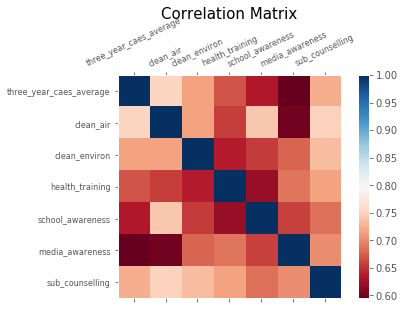

In [40]:
df = obesity_cas 
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(6, 4))
#f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number,cmap=plt.cm.RdBu)
#plt.matshow(df.corr(), fignum=f.number,cmap=plt.cm.RdBu)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=25)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=15,pad=45)

In [3]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break
    print(vif_df)
    return df

In [4]:
# using VIF on the df dataset

df_predictors_selected_VIF = drop_column_using_vif_(df.drop('three_year_caes_average', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)
print(df_predictors_selected_VIF)

                                                      VIF
clean_air                                          3.2794
clean_environ                                      2.7953
health_training                                    2.5174
school_awareness                                   2.7107
media_awareness                                    2.6533
sub_counselling                                    3.4566
The columns remaining after VIF selection are:
Index(['clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling'],
      dtype='object')
     clean_air  clean_environ  health_training  school_awareness  \
0        21000          22000            18000             41000   
1        50000          17000            23000             74000   
2        41000          45000             5000             26000   
3        33000          42000            19000             50000   
4        37000          52000            17000              800

In [5]:
model_case_total = sm.OLS(endog=df[['three_year_caes_average']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_case_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     three_year_caes_average   R-squared:                       0.666
Model:                                 OLS   Adj. R-squared:                  0.653
Method:                      Least Squares   F-statistic:                     48.27
Date:                     Wed, 10 Nov 2021   Prob (F-statistic):           3.36e-32
Time:                             18:26:04   Log-Likelihood:                -1181.0
No. Observations:                      152   AIC:                             2376.
Df Residuals:                          145   BIC:                             2397.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              164.4282     78.115      2.105      0.037      10.037     318.820
clean_air            0.0063      0.002      3.908      0.000       0.003       0.009
clean_environ        0.0039      0.001      3.016      0.003       0.001       0.006
health_training      0.0078      0.003      2.349      0.020       0.001       0.014
school_awareness     0.0002      0.001      0.139      0.889      -0.003       0.003
media_awareness     -0.0010      0.003     -0.369      0.713      -0.006       0.004
sub_counselling      0.0089      0.004      1.977      0.050    3.17e-06       0.018
==============================================================================
Omnibus:                       77.042   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.876
Skew:                           1.795   Prob(JB):                     2.43e-87
Kurtosis:                      10.078   Cond. No.                     2.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='three_year_caes_average ~  clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling',data=df).fit()
                                            

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     three_year_caes_average   R-squared:                       0.666
Model:                                 OLS   Adj. R-squared:                  0.653
Method:                      Least Squares   F-statistic:                     48.27
Date:                     Wed, 10 Nov 2021   Prob (F-statistic):           3.36e-32
Time:                             18:26:14   Log-Likelihood:                -1181.0
No. Observations:                      152   AIC:                             2376.
Df Residuals:                          145   BIC:                             2397.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='three_year_caes_average ~  clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling ',data=df).fit()
                                            

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5, pval_6 = multi_regression_model_1.pvalues

print("y =", round(beta_1,5), "x1 +", round(beta_2,5), "x2 +", round(beta_3,5), "x3 +", round(beta_4,5), "x4 +", round(beta_5,5), "x5 +", round(beta_6,5), "x6 +", round(beta_0,5))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))
print("p-value_6 = ", round(pval_6,3))

                               OLS Regression Results                              
Dep. Variable:     three_year_caes_average   R-squared:                       0.666
Model:                                 OLS   Adj. R-squared:                  0.653
Method:                      Least Squares   F-statistic:                     48.27
Date:                     Wed, 10 Nov 2021   Prob (F-statistic):           3.36e-32
Time:                             18:26:24   Log-Likelihood:                -1181.0
No. Observations:                      152   AIC:                             2376.
Df Residuals:                          145   BIC:                             2397.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [8]:
# Now we store all the relevant values:
predictor_coeffs  = multi_regression_model_1.params[1:]
constant          = multi_regression_model_1.params[0] # called the 'intercept' in simple regression
Rsquared          = multi_regression_model_1.rsquared
MSE               = multi_regression_model_1.mse_resid
pvalues_T         = multi_regression_model_1.pvalues[1:]
pvalue_F          = multi_regression_model_1.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =\n", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =\n", pvalues_T)
print("F-test pvalue          =\n", pvalue_F)

predictor coefficients =
 clean_air                                            0.0063
clean_environ                                        0.0039
health_training                                      0.0078
school_awareness                                     0.0002
media_awareness                                     -0.0010
sub_counselling                                      0.0089
dtype: float64
constant               = 164.42816389160066
Rsquared               = 0.6663757904784604
MSE                    = 344324.1414846143
T-test pvalues         =
 clean_air                                            0.0001
clean_environ                                        0.0030
health_training                                      0.0202
school_awareness                                     0.8893
media_awareness                                      0.7130
sub_counselling                                      0.0499
dtype: float64
F-test pvalue          =
 3.364656774939773e-32


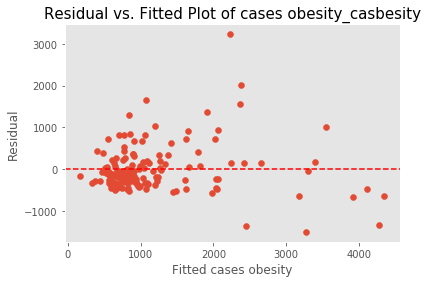

In [34]:
# plot 
plt.figure(figsize=(6,4))
plt.scatter(model_case_total.fittedvalues, model_case_total.resid)
# adding title and labels
plt.xlabel('Fitted cases obesity',fontsize=12)
plt.ylabel('Residual',fontsize=12)
plt.title('Residual vs. Fitted Plot of cases obesity_casbesity',fontsize=15)
plt.axhline(0.0, color='r', linestyle='--', label='xxx')
plt.show()

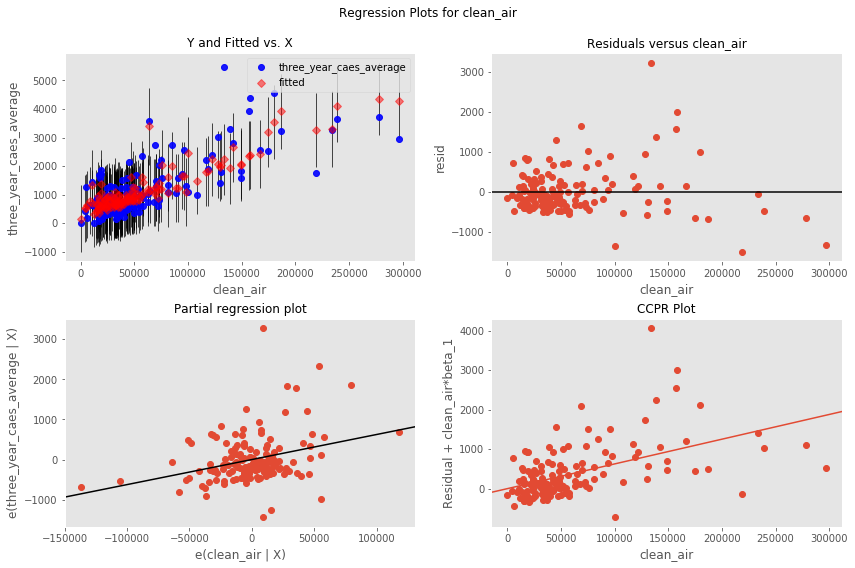

In [38]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_case_total, 'clean_air', fig=fig)